In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.odr import *

In [2]:
data = np.loadtxt('intensity.data')
x = data[:, 0]
ex = data[:,1]
y = data[:,2]
ey = data[:, 3]
th = np.linspace(2, 14, 1000)

In [3]:
def fitfunc(x, a, b):
	return  a * (x**b)

In [4]:
popt, pcov = curve_fit(fitfunc, x, y, p0=(5, -2))
#print(popt)
#print(np.sqrt(np.diag(pcov)))
errors = np.sqrt(np.diag(pcov))
print('Η ένταση των σωματιδίων-α φαίνεται να είναι ανάλογη του d^(',round(popt[1],2), '+/-', round(errors[1],2),')')
print('Ποσοστιαία απόκλιση = ', round(np.abs(-2 - popt[1])/2*100, 0), '%')
print('Σχετική απόκλιση = ', round(np.abs(-2-popt[1])/errors[1], 0), 'σ')
print('Σχετικό σφάλμα = ', round(np.abs(errors[1]/popt[1])*100, 1), '%')

Η ένταση των σωματιδίων-α φαίνεται να είναι ανάλογη του d^( -1.76 +/- 0.02 )
Ποσοστιαία απόκλιση =  12.0 %
Σχετική απόκλιση =  10.0 σ
Σχετικό σφάλμα =  1.4 %


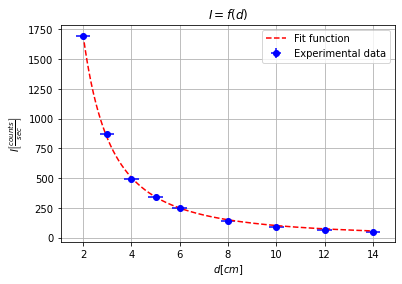

In [5]:
plt.title(r'$I = f(d)$')
plt.xlabel(r'$d [cm]$')
plt.ylabel(r'$I \left[\frac{counts}{sec}\right]$')
plt.grid()
plt.errorbar(x, y, ey, ex, 'bo')
plt.plot(th, fitfunc(th, *popt), 'r--')
plt.legend(['Fit function', 'Experimental data'])
plt.savefig('intensity.png', dpi=500)

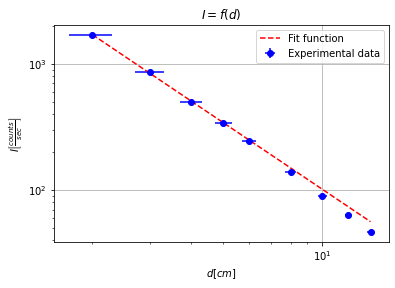

In [6]:
plt.title(r'$I = f(d)$')
plt.xlabel(r'$d [cm]$')
plt.ylabel(r'$I \left[\frac{counts}{sec}\right]$')
plt.grid()
plt.loglog()
plt.errorbar(x, y, ey, ex, 'bo')
plt.plot(th, fitfunc(th, *popt), 'r--')
plt.legend(['Fit function', 'Experimental data'])
plt.savefig('intensitylog.png', dpi=500)